# PREPRINT – Exploring diverse Applications of Drone Technology: From

Active to Passive Remote Sensing – PREPRINT.

Simon Oiry [](https://orcid.org/0000-0001-7161-5246) (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France)  
Philippe Rosa (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France)  
Laurent Barillé (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France)  
March 21, 2024

coucou

In [ ]:
library(terra)

terra 1.7.71

Linking to GEOS 3.11.2, GDAL 3.8.2, PROJ 9.3.1; sf_use_s2() is TRUE


Attachement du package : 'rnaturalearthdata'

L'objet suivant est masqué depuis 'package:rnaturalearth':

    countries110

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks terra::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Le chargement a nécessité le package : cowplot


Attachement du package : 'cowplot'

L'objet suivant est masqué depuis 'package:lubridate':

    stamp

Le chargement a nécessité le package : patchwork


Attachement du package : 'patchwork'

L'objet suivant est masqué depuis 'package:cowplot':

    align_plots

L'objet suivant est masqué depuis 'package:terra':

    area

Le chargement a nécessité le package : magrittr

Attachement du package : 'magrittr'

L'objet suivant est masqué depuis 'package:purrr':

    set_names

L'objet suivant est masqué depuis 'package:tidyr':

    extract

Les objets suivants sont masqués depuis 'package:terra':

    extract, inset


Attachement du package : 'tidyterra'

L'objet suivant est masqué depuis 'package:stats':

    filter

In [ ]:
my_comma<-scales::label_comma(accuracy = NULL, big.mark = ",",decimal.mark = ".")

## Site study

In [ ]:
world_map <- sovereignty10 %>% 
  st_as_sf()

bbox_europe <- st_bbox(c(xmin = -20, ymin = 34,
                         xmax = 30, ymax = 55) ,
                       crs = st_crs(world_map)) 

world_map<-st_make_valid(world_map) 

european_union_country <- st_crop(world_map, bbox_europe)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ") %>% 
  dplyr::pull(unique(SOVEREIGNT))


european_union_map_cropped <- sovereignty10 %>% 
  st_as_sf() %>% 
  dplyr::filter(SOVEREIGNT %in% european_union_country)

Projects<-data.frame(
  Name=c(
  "Spain - Guadalquivir River",
  "Spain - Baiona",
  "France - Noirmoutier Island",
  "Greece - Cape Tainaron"),
  Long=c(-6.23104,
         -8.86272, 
         -2.16741,
         22.486823) ,
  Lat=c(36.8947, 
        42.120795,
        46.9076,
        36.401765) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  

Projects_df<-Projects %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)  %>% 
  tidyr::separate(Name, into=c("Country","Site") ,sep=" - ")  %>% 
  dplyr::mutate(Country=as.factor(Country) ,
                Site=as.factor(Site) ) 

sf_use_s2(FALSE)

bbox_EU <- st_bbox(c(xmin = -30, ymin = 20,
                         xmax = 50, ymax = 70) ,
                       crs = st_crs(european_union_map_cropped) ) 

  MiniEU_map<-st_crop(european_union_map_cropped, bbox_EU)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  

  df_P1<-Projects_df %>% 
    dplyr::mutate(ID = c(1:nrow(.)),
           ID = case_when(ID == 1 ~ "C",
                          ID == 2 ~ "B",
                          ID == 3 ~ "A",
                          TRUE ~ "D")) %>% 
    dplyr::select(c(lon,lat,ID,Site))
    
    scaleFUN <- function(x) paste0(sprintf("%.2f", x),"°N")
  

p1 <-
  ggplot(MiniEU_map) +
  geom_sf(linewidth=0.5,alpha=0.93,
          fill="#CFCFCF",colour="grey30")+
  coord_sf(xlim=c(2600000,5600000) ,
          ylim=c(1600000,3100000))+
    ggforce::geom_mark_ellipse(data=df_P1,
                 aes(x=lon,
                     y=lat,
                     label = ID,
                     description=Site) ,
                 linewidth=0.2,
                 fill="goldenrod",
                 show.legend=F,
                 label.hjust = 0.5,
                 con.size = 1,
                 con.colour = "goldenrod4",
                 label.fontsize = c(20,15),
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") , 
  label.buffer = unit(5, "mm") ,
  label.fill = "grey90")+

  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  scale_y_continuous(labels=scaleFUN)+
  theme(plot.margin = margin(t = 0.1, r = 2, b = 0.1, l = 0.1, "cm"),
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        # panel.background = element_rect(fill = "white"),
        plot.background = element_rect(fill = "white"))



ggsave("Figures/High_res/Figure1/Map_Study_Site.tiff",p1,width= 10, height=5)  

In [ ]:
masks_Noirmoutier <- "Data/shp/Figure1/Noirmoutier_masks_32630.shp"%>% 
  read_sf()

Flight_Noirmoutier <- "Data/shp/Figure1/Noirmoutier_flight_area_32630.shp"%>% 
  read_sf()

Flight_label<-data.frame(
  Name=c(
  "Noirmoutier Island") ,
  Description = c("Multispectral - LiDAR"),
  Long=c(-2.17503) ,
  Lat=c(46.90546) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform(crs(masks_Noirmoutier))  %>% 
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

plot_label_Noirmoutier <- data.frame(x = 551000+((569800-551000)*0.05),
                         y = 5210500-((5210500-5191700)*0.05)) %>% 
  st_as_sf(coords=c("x","y")) %>% 
  st_set_crs(crs(masks_Noirmoutier)) %>% 
  st_coordinates()

Noirmoutier_plot <-
ggplot() +
  scale_fill_manual("", labels = c("Flight area","Intertidal area", "Land area"),
                    values = c("darkred","#7DC27D", "#CFCFCF"))+
  geom_sf(data = masks_Noirmoutier, mapping = aes(fill = Type),linewidth=0.05,alpha=0.93,colour="grey30")+
  geom_sf(data = Flight_Noirmoutier, mapping = aes(fill = Type),linewidth=0.05,alpha=0.80)+
      coord_sf(xlim=c(551000,569800),
               ylim=c(5191700,16800+5193700))+
  ggforce::geom_mark_ellipse(data=Flight_label,
                 aes(x=lon,
                     y=lat,
                     label = Name,
                     group = Name,
                     description=Description),
                 size=0.3,
                 fill = "goldenrod",
                 con.colour = "goldenrod4",
                 show.legend=F,
                 label.fontsize = 25,
                 label.hjust = 0.5,
                 con.size = 2,
                 label.width = 100,
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") ,
  label.fill = "grey90",
  label.buffer = unit(5, "mm")) +
    # theme_void()+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  geom_label(aes(x = plot_label_Noirmoutier[1], y = plot_label_Noirmoutier[2], label = "A"), size = 20)+
  scale_x_continuous(breaks = seq(-2.30, -2.0, by = 0.10))+
  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm") ,
        legend.position = "none",
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        plot.background = element_rect(fill = "white"))


ggsave("Figures/High_res/Figure1/Map_Noirmoutier.tiff",Noirmoutier_plot,width= 10, height=10)  

In [ ]:
masks_Vigo <- "Data/shp/Figure1/Vigo_masks_32629.shp"%>% 
  read_sf()

Flight_Vigo <- "Data/shp/Figure1/Vigo_flight_area_32629.shp"%>% 
  read_sf()


Flight_label_Vigo<-data.frame(
  Name=c(
  "Baiona") ,
  Description = c("Multispectral - LiDAR"),
  Long=c(-8.862174) ,
  Lat=c(42.121263) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform(crs(masks_Vigo))  %>% 
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

plot_label_Vigo <- data.frame(x = 509877+((514679-509877)*0.05),
                         y = 4666200-((4666200-4661398)*0.05)) %>% 
  st_as_sf(coords=c("x","y")) %>% 
  st_set_crs(crs(masks_Vigo)) %>% 
  st_coordinates()

Vigo_plot <- ggplot() +
  scale_fill_manual("", labels = c("Flight area","Intertidal area", "Land area"),
                    values = c("darkred","#7DC27D", "#CFCFCF"))+
  geom_sf(data = masks_Vigo, mapping = aes(fill = Type),linewidth=0.05,alpha=0.93,colour="grey30")+
  geom_sf(data = Flight_Vigo, mapping = aes(fill = Type),linewidth=0.05,alpha=0.80)+
  coord_sf(xlim=c(509877,514679),
               ylim=c(4661398, 4661398 + 4802))+
  ggforce::geom_mark_ellipse(data=Flight_label_Vigo,
                 aes(x=lon,
                     y=lat,
                     label = Name,
                     group = Name,
                     description=Description),
                 size=0.3,
                 fill = "goldenrod",
                 con.colour = "goldenrod4",
                 show.legend=F,
                 label.fontsize = 25,
                 label.hjust = 0.5,
                 con.size = 2,
                 label.width = 100,
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") ,
  label.fill = "grey90",
  label.buffer = unit(5, "mm")) +
    # theme_void()+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  geom_label(aes(x = plot_label_Vigo[1], y = plot_label_Vigo[2], label = "B"), size = 20)+
  scale_x_continuous(breaks = seq(-8.9, -8.80, by = 0.02))+
  scale_y_continuous(position = "right")+

  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm") ,
        legend.position = "none",
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        plot.background = element_rect(fill = "white"))


ggsave("Figures/High_res/Figure1/Map_Vigo.tiff",Vigo_plot,width= 10, height=10)  

In [ ]:
masks_Cadiz <- "Data/shp/Figure1/Cadiz_masks_32629.shp"%>% 
  read_sf()


Flight_label_Cadiz<-data.frame(
  Name=c(
  "La Esparraguera - Tarfia") ,
  Description = c("Multispectral"),
  Long=c(-6.231733) ,
  Lat=c(36.894668) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform(crs(masks_Cadiz))  %>% 
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

plot_label_Cadiz <- data.frame(x = 691004+((774599-691004)*0.05),
                         y = 4116948-((4116948-4033353)*0.05)) %>% 
  st_as_sf(coords=c("x","y")) %>% 
  st_set_crs(crs(masks_Cadiz)) %>% 
  st_coordinates()

Cadiz_plot <- ggplot() +
  scale_fill_manual("", labels = c("Intertidal area", "Land area"),
                    values = c("#7DC27D", "#CFCFCF"))+
  geom_sf(data = masks_Cadiz, mapping = aes(fill = Type),linewidth=0.05,alpha=0.93,colour="grey30")+
  # geom_sf(data = Flight_Vigo, mapping = aes(fill = Type),linewidth=0.05,alpha=0.93)+
      coord_sf(xlim=c(691004,774599),
               ylim=c(4033353, 4033353 + 83595))+
  ggforce::geom_mark_ellipse(data=Flight_label_Cadiz,
                 aes(x=lon,
                     y=lat,
                     label = Name,
                     group = Name,
                     description=Description),
                 size=0.3,
                 fill = "goldenrod",
                 con.colour = "goldenrod4",
                 show.legend=F,
                 label.fontsize = 25,
                 label.hjust = 0.5,
                 con.size = 2,
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") ,
  label.fill = "grey90",
  label.buffer = unit(5, "mm")) +
    # theme_void()+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  geom_label(aes(x = plot_label_Cadiz[1], y = plot_label_Cadiz[2], label = "C"), size = 20)+
  scale_x_continuous(breaks = seq(-6.9, -5.9, by = 0.4))+
  scale_y_continuous(breaks = seq(36.45, 37.25, by = 0.2))+
  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm") ,
        legend.position = "none",
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        plot.background = element_rect(fill = "white"))


ggsave("Figures/High_res/Figure1/Map_Cadiz.tiff",Cadiz_plot,width= 10, height=10)  

In [ ]:
masks_Tainaron <- "Data/shp/Figure1/Tainaron_masks_32634.shp"%>% 
  read_sf()

Flight_Tainaron <- "Data/shp/Figure1/Tainaron_flight_area_32634.shp"%>% 
  read_sf()

Flight_label_Tainaron<-data.frame(
  Name=c(
  "Cape Tainaron") ,
  Description = c("LiDAR"),
  Long=c(22.486439) ,
  Lat=c(36.401831) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform(crs(masks_Tainaron))  %>% 
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

plot_label_Tainaron <- data.frame(x = 630943+((635617-630943)*0.05),
                         y = 4032305-((4032305-4027631)*0.05)) %>% 
  st_as_sf(coords=c("x","y")) %>% 
  st_set_crs(crs(masks_Tainaron)) %>% 
  st_coordinates()

Tainaron_plot <- ggplot() +
  scale_fill_manual("", labels = c("Flight area","Land area"),
                    values = c("darkred","#CFCFCF"))+
  geom_sf(data = masks_Tainaron, mapping = aes(fill = Type),linewidth=0.05,alpha=0.93,colour="grey30")+
  geom_sf(data = Flight_Tainaron, mapping = aes(fill = Type),linewidth=0.05,alpha=0.80)+
      coord_sf(xlim=c(630943,635617),
               ylim=c(4027631, 4027631 + 4674))+
  ggforce::geom_mark_ellipse(data=Flight_label_Tainaron,
                 aes(x=lon,
                     y=lat,
                     label = Name,
                     group = Name,
                     description=Description),
                 size=0.3,
                 fill = "goldenrod",
                 con.colour = "goldenrod4",
                 show.legend=F,
                 label.fontsize = 25,
                 label.hjust = 0.5,
                 con.size = 2,
                 alpha=0.8,
  expand = unit(2, "mm") , 
  radius = unit(2, "mm") ,
  label.fill = "grey90",
  label.buffer = unit(5, "mm")) +
    # theme_void()+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  geom_label(aes(x = plot_label_Tainaron[1], y = plot_label_Tainaron[2], label = "D"), size = 20)+
  scale_x_continuous(breaks = seq(22.45, 22.52, by = 0.02))+
  theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm") ,
        legend.position = "none",
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        plot.background = element_rect(fill = "white"))


ggsave("Figures/High_res/Figure1/Map_Tainaron.tiff",Tainaron_plot,width= 10, height=10)  

In [ ]:
layout <- c(
  patchwork::area(t = 1, l = 1, b = 10, r = 20),
  patchwork::area(t = 11, l = 1, b = 20, r = 10),
  patchwork::area(t = 11, l = 11, b = 20, r = 20),
  patchwork::area(t = 21, l = 1, b = 30, r = 10),
  patchwork::area(t = 21, l = 11, b = 30, r = 20)
)

Tot <-  rast("Figures/High_res/Figure1/Map_Study_Site.tiff")
ext(Tot)<-c(0,2,0,1)

BB <-  rast("Figures/High_res/Figure1/Map_Noirmoutier.tiff")
ext(BB)<-c(0,1,-1,0)

Vig <-  rast("Figures/High_res/Figure1/Map_Vigo2.tif")
ext(Vig)<-c(1,2,-1,0)

Cad <-  rast("Figures/High_res/Figure1/Map_Cadiz.tiff")
ext(Cad)<-c(0,1,-2,-1)

Tai <- rast("Figures/High_res/Figure1/Map_Tainaron2.tiff")
ext(Tai)<-c(1,2,-2,-1)


a<-ggplot()+
    geom_spatraster_rgb(data = Tot, maxcell= 10e+7)+
  geom_spatraster_rgb(data = BB, maxcell= 10e+7)+
  geom_spatraster_rgb(data = Vig, maxcell= 10e+7)+
  geom_spatraster_rgb(data = Cad, maxcell= 10e+7)+
  geom_spatraster_rgb(data = Tai, maxcell= 10e+7)+
  coord_equal()+
  theme_void()+
  theme(axis.text = element_blank(), 
        axis.title = element_blank(), 
        axis.ticks = element_blank(), 
        axis.ticks.length = unit(0, "pt"),
        panel.grid.major=element_blank(), 
        panel.grid.minor=element_blank(), 
        plot.margin = margin(0, 0, 0, 0, "pt"))



ggplot2::ggsave("./Figures/High_res/Figure1/Fig1_Map_Drone_Sites.png",a, dpi = 800)

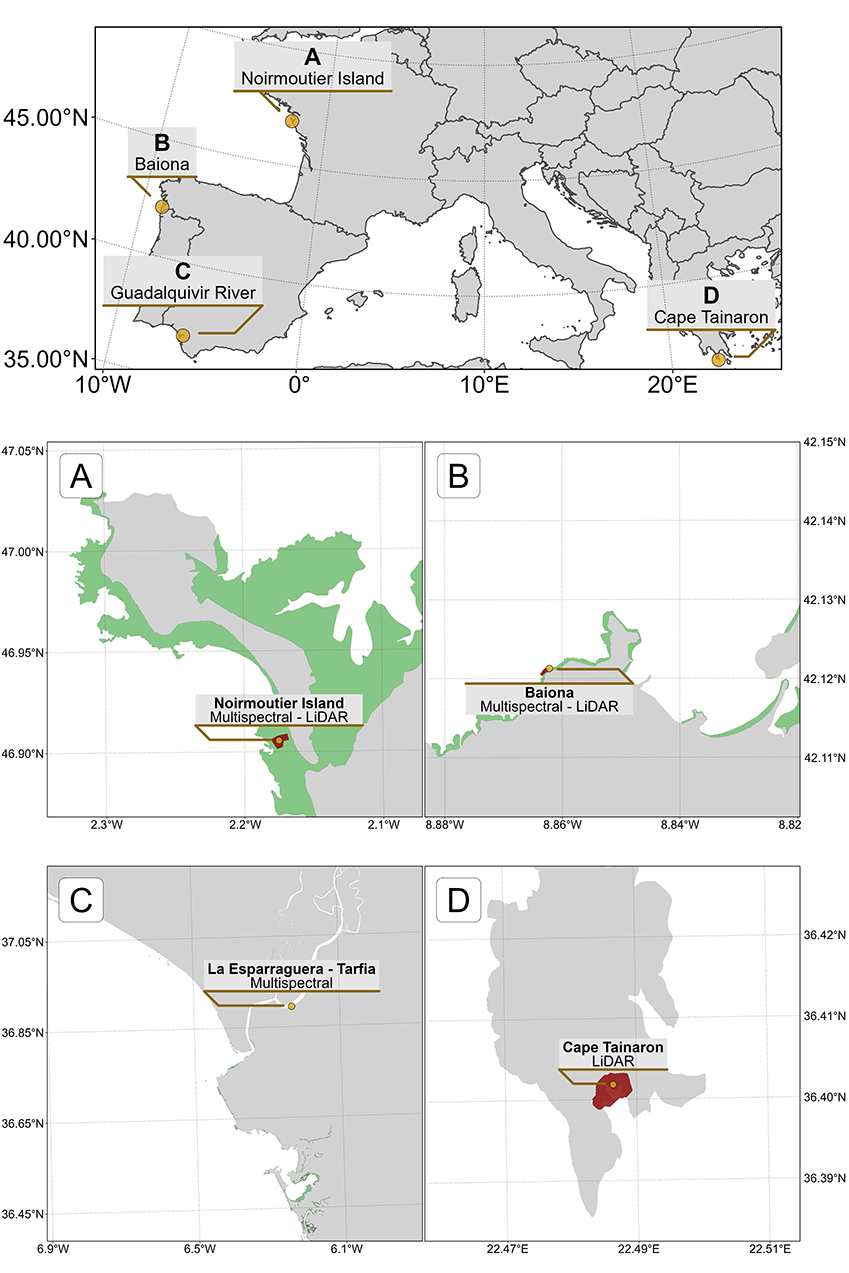

In [ ]:
knitr::include_graphics("./Figures/Low_res/Figure1/Fig1_Map_Drone_Sites.png")